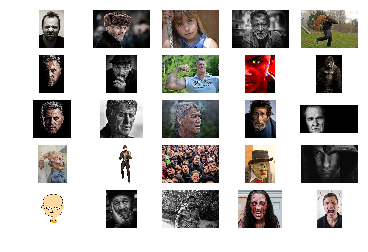

In [7]:
# %load getWebImages.py
import os
import requests
import pprint
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

subscription_key = os.environ['BING_SEARCH_KEY_1']
assert subscription_key
search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/search"
search_term = "angry human"
headers = {"Ocp-Apim-Subscription-Key" : subscription_key}
params  = {"q": search_term, "license": "public", "imageType": "photo"}
response = requests.get(search_url, headers=headers, params=params)
response.raise_for_status()
search_results = response.json()
thumbnail_urls = [img["thumbnailUrl"] for img in search_results["value"][:25]]
print(len(search_results))
f, axes = plt.subplots(5, 5)
for i in range(5):
    for j in range(5):
        image_data = requests.get(thumbnail_urls[i+5*j])
        image_data.raise_for_status()
        image = Image.open(BytesIO(image_data.content))
        axes[i][j].imshow(image)
        axes[i][j].axis("off")
